In [21]:
from pystac import *
from shapely.geometry import Point, Polygon, mapping
import json
from datetime import datetime

## Initialize

In [22]:
properties = {}

## Identifier

variable: item_id

xpath or method: Auxiliary/Root/ProductFilename

field: KMPS5_GTC_B_ES_10_HH_RD_P_20190916093251_20190916093256_20190918030009.h5

notes: remove the extension

example: KMPS5_GTC_B_ES_10_HH_RD_P_20190916093251_20190916093256_20190918030009

-----------------------------------------------------

In [23]:
properties['item_id'] = 'KMPS5_GTC_B_ES_10_HH_RD_P_20190916093251_20190916093256_20190918030009'

## Mission


variable: mission

xpath or method: N/A

field: N/A

notes: HARDCODED

example: kompsat-5

-----------------------------------------------------

variable: platform

xpath or method: /Auxiliary/Root/SatelliteId

field: KMPS5

notes: N/A

example: KMPS5

-----------------------------------------------------

variable: instruments

xpath or method: N/A

field: N/A

notes: HARDCODED

example: COSI

-----------------------------------------------------

In [24]:
properties['mission'] = 'kompsat-5'
properties['platform'] = 'KMPS5'
properties['instruments'] = 'COSI'

## SAT extension

variable: orbit_state

xpath or method: /Auxiliary/Root/OrbitDirection

field: ASCENDING

notes: N/A

example: ASCENDING

-----------------------------------------------------

variable: absolute_orbit

xpath or method: /Auxiliary/Root/OrbitNumber

field: 40077

notes: N/A

example: 40077

-----------------------------------------------------

variable: incidence_angle

xpath or method: /Auxiliary/Root/ReferenceIncidenceAngle

field: 45

notes: N/A

example: if not average between FarIncidenceAngle and NearIncidenceAngle

-----------------------------------------------------

In [25]:
properties['sat:orbit_state'] = 'ASCENDING'
properties['sat:absolute_orbit'] = '40077'
properties['sat:incidence_angle'] = '45'

## SAR extension

variable: sar:observation_direction

xpath or method: /Auxiliary/Root/LookSide

field: RIGHT

notes: Antenna pointing direction, string: as "right" or "left". For KP5 given in capital letters -> e.g. from "RIGHT" to "right"

example: right

-----------------------------------------------------

variable: sar:instrument_mode

xpath or method: /Auxiliary/Root/AcquisitionMode

field: WIDE SWATH

notes: REQUIRED

example: WIDE SWATH

-----------------------------------------------------

variable: sar:frequency_band

xpath or method: /Auxiliary/Root/RadarWavelength

field: N/A

notes: REQUIRED: multiply by 100 to have wavelength in cm and choose among B={L(15-30),S(7.5-15),C(3.8-7.5),X(2.4-3.8)}, i.e. 0.031034415942028985 -> B=X

example: X

-----------------------------------------------------

variable: sar:center_frequency

xpath or method: /Auxiliary/Root/RadarFrequency

field: 9660000000

notes: In gigahertz (GHz), multiple the value by 1e-9.

example: 9.66

-----------------------------------------------------

variable: sar:polarizations

xpath or method: /Auxiliary/Root/SubSwaths/SubSwath id="XX"/Polarisation

field: N/A

notes: REQUIRED Any combination of polarizations. Check each subswath XX=('01','02','03','04')

example: HH

-----------------------------------------------------

variable: sar:product_type

xpath or method: /Auxiliary/Root/RadarFrequency

field: N/A

notes: REQUIRED: from string choose among P=(SSC,MGD,GRD,GEC,GTC,RTC), i.e. GTC_B -> P=GTC

example: GTC

-----------------------------------------------------

In [26]:
properties['sar:observation_direction'] = 'right'
properties['sar:instrument_mode'] = 'WIDE SWATH'
properties['sar:frequency_band'] = 'X'
properties['sar:center_frequency'] = '9.66'
properties['sar:polarizations'] = 'HH'
properties['sar:product_type'] = 'GTC'

## Processing Level


variable: proc:level

xpath or method: /Auxiliary/Root/RadarFrequency

field: N/A

notes: Linked to sar:product_type -> (GTC PRODUCT Synonymous with Level 1D Product, GEC Synonymous with Level 1C Product), Ref. K5 SAR Products Attributes doc, V1.0 / 2014.04.01, page : 4/71)

example: L1D

-----------------------------------------------------

In [27]:
properties['processing:level'] = 'L1D'

## Time


variable: start_datetime

xpath or method: /Auxiliary/Root/SceneSensingStartUTC

field: 2020-12-09 00:42:07.622462000

notes: format to ISO

example: 2020-12-09 00:42:07Z

-----------------------------------------------------

variable: end_datetime

xpath or method: /Auxiliary/Root/SceneSensingStopUTC

field: 2020-12-09 00:42:40.919068000

notes: format to ISO

example: 2020-12-09 00:42:40Z

-----------------------------------------------------

variable: datetime

xpath or method: /Auxiliary/Root/ProductGenerationUTC

field: 2020-12-10 00:25:58.000000000

notes: format to ISO

example: 2020-12-10 00:25:58Z

-----------------------------------------------------

```xml
    <SceneSensingStartUTC>2020-12-09 00:42:07.622462000</SceneSensingStartUTC>
    <SceneSensingStopUTC>2020-12-09 00:42:40.919068000</SceneSensingStopUTC>
```

In [28]:
properties['datetime'] = '2020-12-10T00:25:58Z'
properties['start_datetime'] = '2020-12-09T00:42:07Z'
properties['end_datetime'] = '2020-12-09T00:42:40Z'

## Spatial Information


variable: proj:epsg

xpath or method: /Auxiliary/Root/EllipsoidDesignator, /Auxiliary/Root/ProjectionID, /Auxiliary/Root/MapProjectionZone

field: N/A

notes: Use these 3 fields to derive EPSG. E.g. (WGS84,UNIVERSAL TRANSVERSE MERCATOR,44)->EPSG=32644, (WGS84,UNIVERSAL TRANSVERSE MERCATOR,-50)->EPSG=32750

example: 32644

-----------------------------------------------------

variable: proj:wkt2

xpath or method: /Auxiliary/Root/MBI/XxxXxxGeodeticCoordinates XxxXxx=(BottomLedt,BottomRight,TopLeft,TopRight)

field: N/A

notes: find WKT2 from BBOX

example: N/A

-----------------------------------------------------

In [29]:
properties['proj:epsg'] = 32644
# properties['proj:wkt2'] = ''  ###TBD

## SAR geometry


variable: sar:resolution_range

xpath or method: /Auxiliary/Root/GroundRangeGeometricResolution

field: 16.43536290851652

notes: Range resolution in meters (m)

example: 16.43536290851652

-----------------------------------------------------

variable: sar:resolution_azimuth

xpath or method: /Auxiliary/Root/AzimuthGeometricResolution

field: 19.730255997459341

notes: Azimuth resolution in meters (m)

example: 19.730255997459341

-----------------------------------------------------

variable: sar:pixel_spacing_range

xpath or method: /Auxiliary/Root/SubSwaths/SubSwath id="XX"/GroundRangeInstrumentGeometricResolution

field: 4.0627320771387661

notes: Strongly RECOMMENDED for GRD

example: 4.0627320771387661

-----------------------------------------------------

variable: sar:pixel_spacing_azimuth

xpath or method: /Auxiliary/Root/SubSwaths/SubSwath id="XX"/AzimuthInstrumentGeometricResolution

field: 16.853239427553948

notes: Strongly RECOMMENDED for GRD

example: 16.853239427553948

-----------------------------------------------------

variable: sar:looks_range

xpath or method: /Auxiliary/Root/Root/RangeProcessingNumberofLooks

field: 7

notes: number of looks perpendicular to the flight path

example: 7

-----------------------------------------------------

variable: sar:looks_azimuth

xpath or method: /Auxiliary/Root/Root/AzimuthProcessingNumberofLooks

field: 1

notes: number of looks parallel to the flight path

example: 1

-----------------------------------------------------

variable: sar:looks_equivalent_number

xpath or method: /Auxiliary/Root/MBI/EquivalentNumberofLooks

field: 4.0476193428039551

notes: The equivalent number of looks (ENL)

example: 4.0476193428039551

-----------------------------------------------------

In [30]:
properties['sar:resolution_range'] = 16.43536290851652
properties['sar:resolution_azimuth'] = 19.730255997459341
properties['sar:pixel_spacing_range'] = 4.0627320771387661
properties['sar:pixel_spacing_azimuth'] = 16.853239427553948
properties['sar:looks_range'] = 7
properties['sar:looks_azimuth'] = 1
properties['sar:looks_equivalent_number'] = 4.0476193428039551

## GSD

Wide swath mode imagery, 100 km swath width At nominal incidence angle of 45º -> 20 m GSD

In [31]:
properties['gsd'] = 20.0

## Image Geometry

Geometry information at: /Auxiliary/Root/SubSwaths/SubSwath/SBI>
```xml
    <TopLeftGeodeticCoordinates>8.5997569381504899, 79.502419753930653, -96.708727340610722</TopLeftGeodeticCoordinates>
    <TopRightGeodeticCoordinates>8.60248389641262, 80.621019754110122, 56.472185919132002</TopRightGeodeticCoordinates>
    <BottomRightGeodeticCoordinates>7.4736259647067236, 80.62206588155189, 275.36740178243844</BottomRightGeodeticCoordinates>
    <BottomLeftGeodeticCoordinates>7.4712610779009792, 79.506551881741757, -98.916134332857993</BottomLeftGeodeticCoordinates>
```

In [32]:
p1 = Point(8.5997569381504899, 79.502419753930653)
p2 = Point(8.60248389641262, 80.621019754110122)
p3 = Point(7.4736259647067236, 80.62206588155189)
p4 = Point(7.4712610779009792, 79.506551881741757)
p5 = Point(8.5997569381504899, 79.502419753930653)

In [33]:
footprint = Polygon([p.x, p.y] for p in [p1, p2, p3, p4, p5])

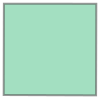

In [34]:
footprint

In [35]:
bbox = list(footprint.bounds)

bbox

[7.471261077900979, 79.50241975393065, 8.60248389641262, 80.62206588155189]

In [36]:
geometry = mapping(footprint)

geometry

{'type': 'Polygon',
 'coordinates': (((8.59975693815049, 79.50241975393065),
   (8.60248389641262, 80.62101975411012),
   (7.473625964706724, 80.62206588155189),
   (7.471261077900979, 79.50655188174176),
   (8.59975693815049, 79.50241975393065)),)}

## Item

In [37]:
item = Item(id=item_id, 
           geometry=mapping(footprint),
           bbox=bbox,
           datetime=datetime.strptime(properties['datetime'], '%Y-%m-%dT%H:%M:%SZ'),
           properties=properties,
           stac_extensions=['eo', 'sat', 'proj', 'sar', 'processing'])

NameError: name 'item_id' is not defined

In [18]:
item

<module 'pystac.item' from '/srv/conda/envs/env_kompsat_5/lib/python3.7/site-packages/pystac/item.py'>

In [19]:
item.to_dict()

AttributeError: module 'pystac.item' has no attribute 'to_dict'

In [20]:
asset = Asset(href='./{}'.format('K5_20210109220808_000010_40557_D_ES01_HH_GTC_B_L1D.tif'),
              media_type=MediaType.GEOTIFF,
              roles=['data'])

In [90]:
asset.to_dict()

{'href': './K5_20210109220808_000010_40557_D_ES01_HH_GTC_B_L1D.tif',
 'type': 'image/tiff; application=geotiff',
 'roles': ['data']}

In [91]:
item.add_asset(key='data', asset=asset)

<Item id=KMPS5_GTC_B_ES_10_HH_RD_P_20190916093251_20190916093256_20190918030009>

In [92]:
item.to_dict()

{'type': 'Feature',
 'stac_version': '1.0.0-beta3',
 'id': 'KMPS5_GTC_B_ES_10_HH_RD_P_20190916093251_20190916093256_20190918030009',
 'properties': {'item_id': 'KMPS5_GTC_B_ES_10_HH_RD_P_20190916093251_20190916093256_20190918030009',
  'mission': 'kompsat-5',
  'platform': 'KMPS5',
  'instruments': 'COSI',
  'sat:orbit_state': 'ASCENDING',
  'sat:absolute_orbit': '40077',
  'sat:incidence_angle': '45',
  'sar:observation_direction': 'right',
  'sar:instrument_mode': 'WIDE SWATH',
  'sar:frequency_band': 'X',
  'sar:center_frequency': '9.66',
  'sar:polarizations': 'HH',
  'sar:product_type': 'GTC',
  'proc:level': 'L1D',
  'created': '2020-12-10 00:25:58Z',
  'start_datetime': '2020-12-09T00:42:07Z',
  'end_datetime': '2020-12-09T00:42:40Z',
  'proj:epsg': 32644,
  'sar:resolution_range': 16.43536290851652,
  'sar:resolution_azimuth': 19.73025599745934,
  'sar:pixel_spacing_range': 4.062732077138766,
  'sar:pixel_spacing_azimuth': 16.853239427553948,
  'sar:looks_range': 7,
  'sar:look

In [93]:
item.add_asset(key='metadata', asset=Asset(href='./{}'.format('K5_20210109220808_000010_40557_D_ES01_HH_GTC_B_L1D_Aux.xml'),
              media_type=MediaType.XML,
              roles=['metadata']))

<Item id=KMPS5_GTC_B_ES_10_HH_RD_P_20190916093251_20190916093256_20190918030009>

In [94]:
item.to_dict()

{'type': 'Feature',
 'stac_version': '1.0.0-beta3',
 'id': 'KMPS5_GTC_B_ES_10_HH_RD_P_20190916093251_20190916093256_20190918030009',
 'properties': {'item_id': 'KMPS5_GTC_B_ES_10_HH_RD_P_20190916093251_20190916093256_20190918030009',
  'mission': 'kompsat-5',
  'platform': 'KMPS5',
  'instruments': 'COSI',
  'sat:orbit_state': 'ASCENDING',
  'sat:absolute_orbit': '40077',
  'sat:incidence_angle': '45',
  'sar:observation_direction': 'right',
  'sar:instrument_mode': 'WIDE SWATH',
  'sar:frequency_band': 'X',
  'sar:center_frequency': '9.66',
  'sar:polarizations': 'HH',
  'sar:product_type': 'GTC',
  'proc:level': 'L1D',
  'created': '2020-12-10 00:25:58Z',
  'start_datetime': '2020-12-09T00:42:07Z',
  'end_datetime': '2020-12-09T00:42:40Z',
  'proj:epsg': 32644,
  'sar:resolution_range': 16.43536290851652,
  'sar:resolution_azimuth': 19.73025599745934,
  'sar:pixel_spacing_range': 4.062732077138766,
  'sar:pixel_spacing_azimuth': 16.853239427553948,
  'sar:looks_range': 7,
  'sar:look

In [95]:
item.add_asset(key='overview', asset=Asset(href='./{}'.format('K5_20210109220808_000010_40557_D_ES01_HH_GTC_B_L1D_QL.png'),
              media_type=MediaType.XML,
              roles=['overview']))

<Item id=KMPS5_GTC_B_ES_10_HH_RD_P_20190916093251_20190916093256_20190918030009>

In [96]:
item.to_dict()

{'type': 'Feature',
 'stac_version': '1.0.0-beta3',
 'id': 'KMPS5_GTC_B_ES_10_HH_RD_P_20190916093251_20190916093256_20190918030009',
 'properties': {'item_id': 'KMPS5_GTC_B_ES_10_HH_RD_P_20190916093251_20190916093256_20190918030009',
  'mission': 'kompsat-5',
  'platform': 'KMPS5',
  'instruments': 'COSI',
  'sat:orbit_state': 'ASCENDING',
  'sat:absolute_orbit': '40077',
  'sat:incidence_angle': '45',
  'sar:observation_direction': 'right',
  'sar:instrument_mode': 'WIDE SWATH',
  'sar:frequency_band': 'X',
  'sar:center_frequency': '9.66',
  'sar:polarizations': 'HH',
  'sar:product_type': 'GTC',
  'proc:level': 'L1D',
  'created': '2020-12-10 00:25:58Z',
  'start_datetime': '2020-12-09T00:42:07Z',
  'end_datetime': '2020-12-09T00:42:40Z',
  'proj:epsg': 32644,
  'sar:resolution_range': 16.43536290851652,
  'sar:resolution_azimuth': 19.73025599745934,
  'sar:pixel_spacing_range': 4.062732077138766,
  'sar:pixel_spacing_azimuth': 16.853239427553948,
  'sar:looks_range': 7,
  'sar:look

In [97]:
write_file(item, include_self_link=True, dest_href=f'MetadataExtractorsTests_{item.id}.json')